In [43]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
#read in data set
df = pd.read_csv('Dataset/listings.csv')
# pick up all the potential useful col - integer + sequential list + dates and other useful cols
df = df[["host_is_superhost","host_verifications","host_has_profile_pic","host_identity_verified","zipcode",
         "is_location_exact","room_type","accommodates","bathrooms","bedrooms","beds","amenities","price",
         "security_deposit",
         "number_of_reviews","review_scores_rating","instant_bookable","cancellation_policy"]]
print (len(df))
# room_type - dummy cancellation_policy
# NA - square_feet	weekly_price	monthly_price	security_deposit	cleaning_fee review_scores_rating
df.columns.values

9663


array(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'zipcode', 'is_location_exact',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'security_deposit', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy'],
      dtype=object)

No handles with labels found to put in legend.


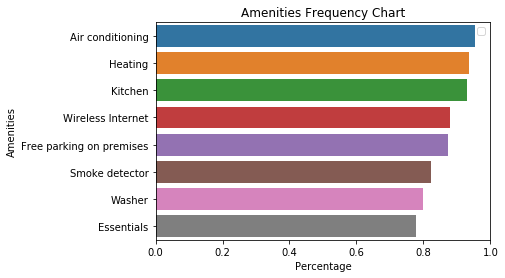

,0,1
7,Air conditioning,0.954569
6,Heating,0.934803
5,Kitchen,0.929732
4,Wireless Internet,0.879644
3,Free parking on premises,0.872607
2,Smoke detector,0.823554
1,Washer,0.798924
0,Essentials,0.777088


In [46]:
# Explore what's the most important items in amenities
list1 = []
st = ""
for i in df["amenities"]:
    for j in i:
        st += j

special_char = '}{""'
st2 = ''
for char in special_char:
    st2 = st.replace(char,'')

st2 = st2.replace("{","")
l2 = st2.split(",")
dict1 = {}
for i in l2:
    if i not in dict1:
        dict1[i] = 1
    else:
        value = dict1.get(i)
        dict1[i] = value + 1
# sort dirct1
sorted_d = sorted(dict1.items(), key=lambda x: x[1])

# most important key words:
l4 = [('Essentials', 1.0*7509/9663), ('Washer', 1.0*7720/9663), ('Smoke detector', 1.0*7958/9663), ('Free parking on premises', 1.0*8432/9663), ('Wireless Internet', 1.0*8500/9663), ('Kitchen', 1.0*8984/9663), ('Heating', 1.0*9033/9663), ('Air conditioning', 1.0*9224/9663)]

df3 = pd.DataFrame(l4)
df3 = df3.sort_values(by = 1, ascending = False)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=df3[1], y=df3[0])
plt.xlim(0., 1.0)
# Add labels to your graph
plt.xlabel('Percentage')
plt.ylabel('Amenities')
plt.title("Amenities Frequency Chart")
plt.legend()
plt.show()

df3

# Clean data

In [47]:
# convert t(True) = 1; f(False) = 0;
df["host_is_superhost"] = df["host_is_superhost"].replace('f',0).replace('t',1)
df["host_has_profile_pic"] = df["host_has_profile_pic"].replace('f',0).replace('t',1)
df["host_identity_verified"] = df["host_identity_verified"].replace('f',0).replace('t',1)
df["is_location_exact"] = df["is_location_exact"].replace('f',0).replace('t',1)
df["instant_bookable"] = df["instant_bookable"].replace('f',0).replace('t',1)

# Run the code only once
# Read how many elements inside the host_verifications ex['email', 'phone', 'reviews'] = 3
def count_len(st):
    list1 = st.split(',')
    return len(list1)
df["host_verifications"] = df["host_verifications"].map(count_len)
df["host_verifications"][:5]

# Run the code only once
# apply the same func to amenities {"Cable TV","Wireless Internet","Air conditioning"} - did not really work well if we directly count the 
# number of amenities. Therefore, for the second try, we decided to count several key words:
# TV Internet Air-conditioning Parking 
keylist = ['Essentials','Washer','Smoke detector','Free parking on premises','Wireless Internet','Kitchen','Heating','Air conditioning']
count_list = []
for i in df["amenities"]:
    count = 1
    for j in keylist:
        if j in i:
            count += 1
    count_list.append(count)
count_df =  pd.Series(count_list).astype(int)

df['amenities'] = count_df
df["amenities"][:5]

# Run this code only once
# There are 3 types of room_type: ['Entire home/apt', 'Shared room', 'Private room'], we give them [3,1,2]
def rate_room(room):
    if room == "Entire home/apt":
        return 3
    elif room == "Shared room":
        return 1
    elif room == "Private room":
        return 2

df["room_type"] = df["room_type"].map(rate_room)
df["room_type"] [:10]

# remove $ and other special char, run this code only once
def no_special_char(st):
    special_cha = '$'
    for i in special_cha:
        if i in st:
            return st.replace(i,'0')
def no_comma(st):
        return  st.replace(',', '')
def no_dot(st):
        return  st.replace('.00', '')
def to_int(st):
        return int(st)

#df["cleaning_fee"].fillna(value=pd.np.nan, inplace=True)
# fill na
df["security_deposit"] = df["security_deposit"].fillna('0')
df["bedrooms"] = df["bedrooms"].fillna('0')
df["bathrooms"] = df["bathrooms"].fillna('0')
df["zipcode"] = df["zipcode"].fillna('0')
df.zipcode = df.zipcode.astype(int)
df.bedrooms = df.bedrooms.astype(int)
df.bathrooms = df.bathrooms.astype(int)

df["price"] = df["price"].map(no_special_char)
df["price"] = df["price"].map(no_comma)
df["price"] = df["price"].map(no_dot)
df["price"] = df["price"].map(to_int)

# cancelation col:['strict', 'moderate', 'flexible', 'super_strict_30','super_strict_60'] [3,2,1,4,4]
def cancel_type(type):
    if type == "strict":
        return 3
    elif type == "moderate":
        return 2
    elif type == "flexible":
        return 1
    else:
        return 4
    
df["cancellation_policy"] = df["cancellation_policy"].map(cancel_type)

# Exploratory Analysis

In [48]:
df[:10]

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,zipcode,is_location_exact,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,0.0,3,1.0,0.0,78756,1,3,5,2,3,4.0,8,130,400,3,100.0,0,3
1,0.0,4,1.0,0.0,78756,1,3,7,2,3,5.0,7,500,500,2,99.0,0,3
2,0.0,3,1.0,0.0,78756,1,3,4,1,1,2.0,9,195,150,7,100.0,0,2
3,0.0,4,1.0,1.0,78756,1,3,12,3,4,5.0,9,300,150,3,93.0,0,3
4,1.0,3,1.0,0.0,78757,1,3,2,1,1,1.0,7,105,100,122,98.0,0,2
5,0.0,3,1.0,0.0,78757,1,1,1,1,1,1.0,6,150,0,0,NaN,1,2
6,0.0,4,1.0,0.0,78751,1,3,1,1,1,1.0,8,80,500,0,NaN,1,1
7,1.0,5,1.0,1.0,78756,1,3,2,1,0,1.0,8,85,0,62,96.0,1,2
8,0.0,4,1.0,0.0,78751,1,3,2,1,0,1.0,8,90,500,0,NaN,1,1
9,1.0,3,1.0,0.0,78756,1,3,4,1,1,2.0,8,115,500,77,99.0,0,2


Pricing for all Airbnb listings

Text(0, 0.5, 'Price')

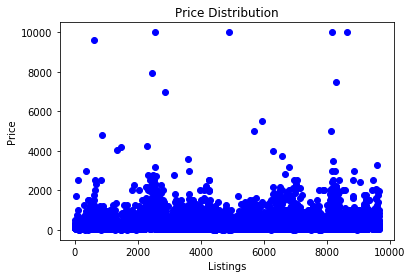

In [49]:
plot(df.index,df['price'],marker ='o', color='blue',linestyle='None')
title('Price Distribution')
xlabel('Listings')
ylabel('Price')

-Lower pricing, More reviews

Text(0.5, 0, 'Counts')

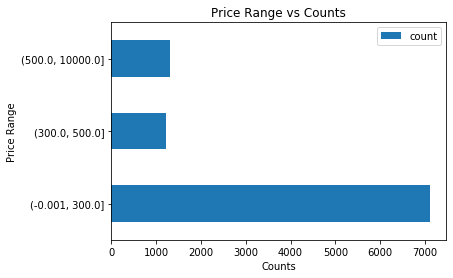

In [50]:

df_1 = df.copy()

df_1['price_bin'] = pd.qcut(df_1['price'], [0.0, .71, .85, 1.])
#df_1['price_bin'] = pd.qcut
df_1.groupby(['price_bin'])['number_of_reviews'].agg(['count']).plot.barh()
title('Price Range vs Counts')
ylabel('Price Range')
xlabel('Counts')

Most of the Super Host has lower price house

,count
price_bin,
"(-0.001, 300.0]",1492
"(300.0, 500.0]",122
"(500.0, 10000.0]",126


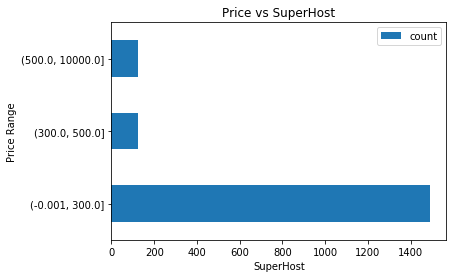

In [51]:
mask = df_1['host_is_superhost'] == 1

df_1[mask].groupby(['price_bin'])['price'].agg(['count']).plot.barh()
title('Price vs SuperHost')
ylabel('Price Range')
xlabel('SuperHost')

df_1[mask].groupby(['price_bin'])['price'].agg(['count'])

9    5306
8    2350
7    1187
6     415
1     197
5     137
4      39
3      22
2      10
Name: amenities, dtype: int64

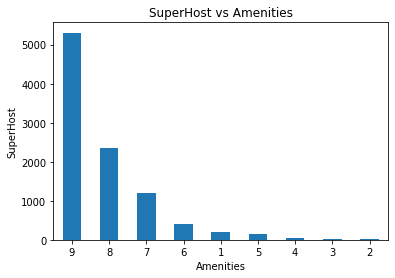

In [52]:
mask = df_1['amenities'] >= 3

df_1['amenities'].value_counts().plot(kind='bar',rot=0)
title('SuperHost vs Amenities')
ylabel('SuperHost')
xlabel('Amenities')

df_1['amenities'].value_counts()

The relationship between is superhost vs Number of Reviews 

the higher price,the better review score
- in high price houses, guests and hosts tend to respect to each other
- Therefore, the high price hosts usually have higher review score.

Text(0.5, 0, 'Price Category')

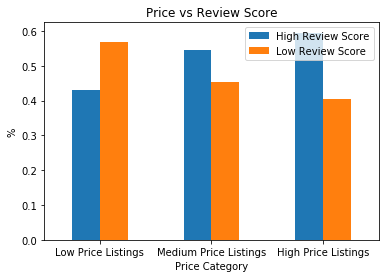

In [53]:
df_1['review_score_bin'] = pd.cut(df_1['review_scores_rating'], [0,99,100])
df_price_review = df_1.groupby(['price_bin','review_score_bin'])['review_scores_rating'].agg(['count'])

percent_review = np.array(['0.568385','0.431615','0.453911','0.546089','0.405253','0.594747'])
percentage = pd.Series(percent_review, index =df_price_review.index) 
#print percentage
low_review = [0.568385, 0.453911, 0.405253]
high_review = [0.431615, 0.546089, 0.594747]
index = ['Low Price Listings', 'Medium Price Listings', 'High Price Listings']
df_123 = pd.DataFrame({'High Review Score': high_review,'Low Review Score': low_review}, index=index)
ax = df_123.plot.bar(rot=0)

title('Price vs Review Score')
ylabel('%')
xlabel('Price Category')



Bedroom distribution, private bedroom leads to better review ratings, which ultimately leads to higher price?

Text(0.5, 0, 'Number of bedroom')

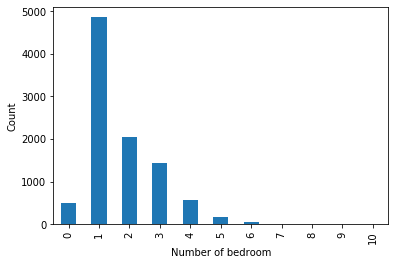

In [54]:
df_1['bedrooms'].value_counts().sort_index().plot(kind="bar")
ylabel('Count')
xlabel('Number of bedroom')

Text(0, 0.5, 'Review Score')

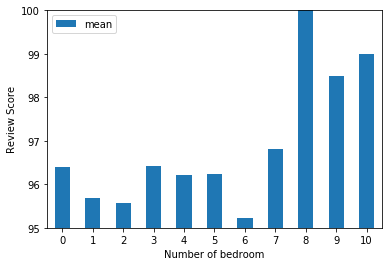

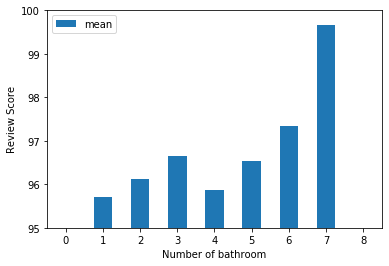

In [55]:
bed_review = df_1.groupby(['bedrooms'])['review_scores_rating'].agg(['mean']).plot(kind = 'bar',rot=0).set_ylim(95,100)
xlabel('Number of bedroom')
ylabel('Review Score')
bath_review = df_1.groupby(['bathrooms'])['review_scores_rating'].agg(['mean']).plot(kind = 'bar',rot=0).set_ylim(95,100)
xlabel('Number of bathroom')
ylabel('Review Score')

Cancelation Policy andd price    

# Logistic Regression

In [56]:
# we split the price 
df.price.quantile(0.75)

formula = 'target ~ 0 +host_is_superhost + host_verifications + host_has_profile_pic + host_identity_verified ' + \
           '+ is_location_exact + accommodates + bathrooms + bedrooms + beds' + \
          '+amenities'+ \
        '+number_of_reviews + review_scores_rating + instant_bookable + C(cancellation_policy)'      
        
# price not included C(room_type)
df['target'] = 0.0
df['target'][df['price'] >= 300] = 1.0 # if >= 300, high price
df['target'].value_counts()

Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the classifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [57]:
from sklearn import metrics
#train accuracy
prediction_train = model.predict(X_train)
print (metrics.accuracy_score(y_train, prediction_train))

0.8734359961501443


In [58]:
#predict accuracy
prediction = model.predict(X_test)
print (metrics.accuracy_score(y_test, prediction))

0.8742985409652076


In [59]:
# y_train is 0 or 1.
print ('Number of positive examples =', len(y_train[y_train==1]))
print ('Number of negative examples =', len(y_train[y_train==0]))

negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print ('Number of examples where baseline is correct =', negative_examples_in_test)
print ('Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test)

Number of positive examples = 842
Number of negative examples = 3314
Number of examples where baseline is correct = 1415
Baseline accuracy = 0.7940516273849607


In [60]:
model.coef_

array([[-0.61145192, -0.53842068,  0.06522053, -0.67425442, -0.59732564,
        -0.06950998, -0.44019432,  0.01366712,  0.53178121,  0.2194082 ,
         0.91412739,  0.57770866,  0.06027548, -0.2313256 , -0.02440561,
        -0.00743448,  0.05951989]])

In [61]:
model.intercept_

array([-1.75890648])

No handles with labels found to put in legend.


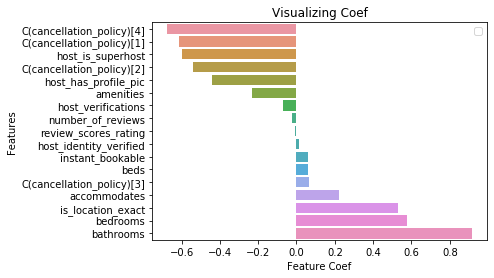

C(cancellation_policy)[4]   -0.674254
C(cancellation_policy)[1]   -0.611452
host_is_superhost           -0.597326
C(cancellation_policy)[2]   -0.538421
host_has_profile_pic        -0.440194
amenities                   -0.231326
host_verifications          -0.069510
number_of_reviews           -0.024406
review_scores_rating        -0.007434
host_identity_verified       0.013667
instant_bookable             0.059520
beds                         0.060275
C(cancellation_policy)[3]    0.065221
accommodates                 0.219408
is_location_exact            0.531781
bedrooms                     0.577709
bathrooms                    0.914127
dtype: float64

In [62]:
weights = Series(model.coef_[0],
                 index=X.columns.values)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=weights.sort_values(ascending = True), y=weights.sort_values().index)
# Add labels to your graph
plt.xlabel('Feature Coef')
plt.ylabel('Features')
plt.title("Visualizing Coef")
plt.legend()
plt.show()

weights.sort_values()

**Observations**

*  **room_type** 
    * 1 = shared
    * 2 = private
    * 3 = entire
* **cancellation_policy** 
    * ['strict', 'moderate', 'flexible', 'super_strict_30','super_strict_60'] [3,2,1,4,4] 


# Tree Method

In [63]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%pylab inline
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [64]:
print (len(df))
df.columns.values

9663


array(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'zipcode', 'is_location_exact',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'security_deposit', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'cancellation_policy',
       'target'], dtype=object)

Text(0.5, 0, 'Counts')

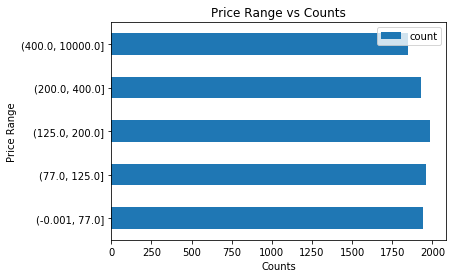

In [65]:

df_4 = df.copy()

df_4['price_bin'] = pd.qcut(df_4['price'], [0, 0.20, 0.40, 0.60, 0.80,1.0])
df_4.groupby(['price_bin'])['number_of_reviews'].agg(['count']).plot.barh()
title('Price Range vs Counts')
ylabel('Price Range')
xlabel('Counts')

In [66]:

def cate_price(price):
    if price <= 200:
        return 1
    elif price <= 400:
        return 2
    else:
        return 3
    
df['price'] = df['price'].map(cate_price)

In [67]:
df['price'] [:5]

0    1
1    3
2    1
3    2
4    1
Name: price, dtype: int64

In [68]:

formula = 'price ~ 0 +host_is_superhost + host_verifications + host_has_profile_pic + host_identity_verified ' + \
           '+ is_location_exact + accommodates + bathrooms + bedrooms + beds' + \
          '+amenities'+ \
        '+number_of_reviews + review_scores_rating + instant_bookable + C(cancellation_policy)'#print formula
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['price'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Depth

Text(0.5, 1.0, 'Decision Tree Depth')

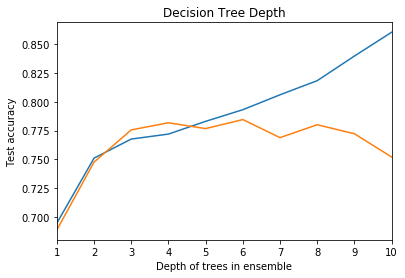

In [69]:
scores_train = {}
scores_test = {}
for depth in range(1, 11):
    model =  tree.DecisionTreeClassifier(criterion='entropy' ,max_depth = depth)
    model.fit(X_train, y_train)
    
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores_test[depth] = accuracy_test
    
    prediction_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, prediction_train)
    scores_train[depth] = accuracy_train
    
Series(scores_train).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Series(scores_test).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

title('Decision Tree Depth')

# Bagging Depth

Text(0.5, 1.0, 'Bagging Depth')

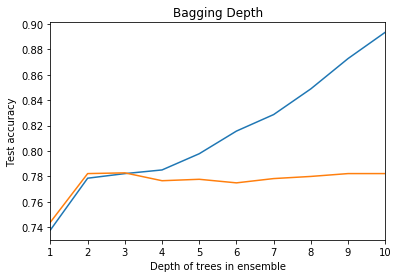

In [70]:
scores_train = {}
scores_test = {}
for depth in range(1, 11):
    model =  BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy',max_depth = depth), random_state=1)
    model.fit(X_train, y_train)
    
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores_test[depth] = accuracy_test
    
    prediction_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, prediction_train)
    scores_train[depth] = accuracy_train
    
Series(scores_train).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Series(scores_test).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

title('Bagging Depth')

# RF

Text(0.5, 1.0, 'Random Forest Depth')

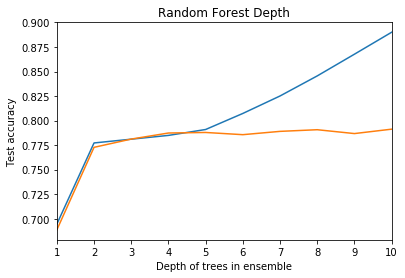

In [71]:
scores_train = {}
scores_test = {}
for depth in range(1, 11):
    model =  RandomForestClassifier(n_estimators=200,max_depth = depth, random_state=1)
    model.fit(X_train, y_train)
    
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores_test[depth] = accuracy_test
    
    prediction_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, prediction_train)
    scores_train[depth] = accuracy_train
    
Series(scores_train).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Series(scores_test).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

title('Random Forest Depth')

Text(0.5, 1.0, 'Random Forest Num Tree')

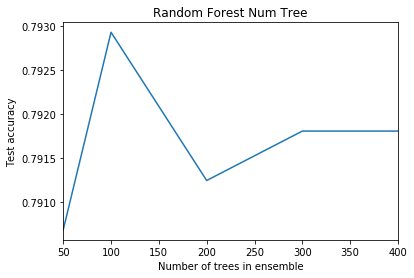

In [72]:
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = RandomForestClassifier(n_estimators=num_trees,max_depth = depth, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

title('Random Forest Num Tree')

# G

Text(0.5, 1.0, 'Boosting Depth')

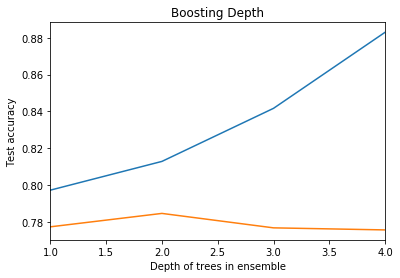

In [73]:
scores_train = {}
scores_test = {}
for depth in range(1, 5):
    model =  GradientBoostingClassifier(n_estimators=200, max_depth=depth, random_state=1)
    model.fit(X_train, y_train)
    
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores_test[depth] = accuracy_test
    
    prediction_train = model.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, prediction_train)
    scores_train[depth] = accuracy_train
    
Series(scores_train).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

Series(scores_test).sort_index().plot()
xlabel('Depth of trees in ensemble')
ylabel('Test accuracy')

title('Boosting Depth')

Text(0.5, 1.0, 'Boosting Num Tree')

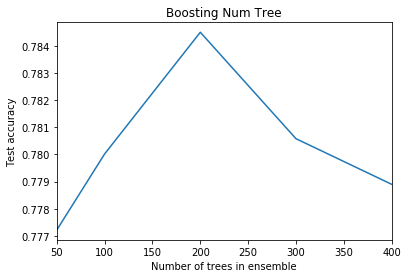

In [74]:
scores = {}
for num_trees in [50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')


title('Boosting Num Tree')

In [75]:
#All the models we want to test out, in one list.
model_decision = tree.DecisionTreeClassifier(criterion='entropy' ,max_depth = 5)
model_bagging = BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy',max_depth = 2), random_state=1)
model_rf = RandomForestClassifier(n_estimators=210, max_depth = 5, random_state=1)
model_g =  GradientBoostingClassifier(n_estimators=120, max_depth=1, random_state=1)
#for (name, model) in model_list:
#    print 'Fitting', name
model_decision.fit(X_train, y_train)
model_bagging.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_g.fit(X_train, y_train)
from sklearn import metrics

Accuracy for Decision Tree
Train: 0.7829643888354186
Test: 0.77665544332211

Accuracy for Bagging
Train: 0.7786333012512031
tTest: 0.7822671156004489

Accuracy for RF
Train: 0.7925890279114534
Test: 0.7878787878787878
Accuracy for Boosting
Train: 0.7937921077959577
Test: 0.7749719416386083


Text(0.5, 0, '')

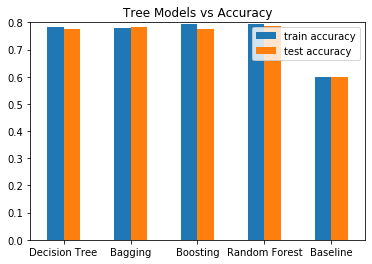

In [76]:
# model_decision
prediction_train = model_decision.predict(X_train)
accuracy_train_1 = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model_decision.predict(X_test)
accuracy_test_1 = metrics.accuracy_score(y_test, prediction_test)
print ('Accuracy for Decision Tree')
print ('Train:',accuracy_train_1)
print ('Test:',accuracy_test_1)
print()
# model_bagging
prediction_train = model_bagging.predict(X_train)
accuracy_train_2 = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model_bagging.predict(X_test)
accuracy_test_2 = metrics.accuracy_score(y_test, prediction_test)
print ('Accuracy for Bagging')

print ('Train:',accuracy_train_2)
print ('tTest:',accuracy_test_2)
print()

# model_rf
prediction_train = model_rf.predict(X_train)
accuracy_train_3 = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model_rf.predict(X_test)
accuracy_test_3 = metrics.accuracy_score(y_test, prediction_test)
print ('Accuracy for RF')

print ('Train:',accuracy_train_3)
print ('Test:',accuracy_test_3)
print
# model_g
prediction_train = model_g.predict(X_train)
accuracy_train_4 = metrics.accuracy_score(y_train, prediction_train)
prediction_test = model_g.predict(X_test)
accuracy_test_4 = metrics.accuracy_score(y_test, prediction_test)
print ('Accuracy for Boosting')

print ('Train:',accuracy_train_4)
print ('Test:',accuracy_test_4)

Baseline_accuracy = 0.60
Baseline_accuracy2 = 0.60

train= [accuracy_train_1, accuracy_train_2,accuracy_train_4,accuracy_train_3,Baseline_accuracy]
test = [accuracy_test_1, accuracy_test_2, accuracy_test_4,accuracy_test_3,Baseline_accuracy2]
index = ['Decision Tree', 'Bagging', 'Boosting','Random Forest','Baseline']
df_123 = pd.DataFrame({'train accuracy': train,'test accuracy': test}, index=index)
ax = df_123.plot.bar(rot=0).set_ylim(0.0,0.80)

title('Tree Models vs Accuracy')
ylabel('')
xlabel('')

In [77]:
accuracy_train_1

0.7829643888354186

In [78]:
import pandas as pd

# Create Series for coef
thelist = [ ['host_is_superhost'], ['host_verifications'], ['host_has_profile_pic'],["host_identity_verified"],["is_location_exact"],["accommodates"],["bathrooms"],["bedrooms"],["beds"],["amenities"],["number_of_reviews"],["review_scores_rating"],["instant_bookable"],["cancellation_policyL1"],["cancellation_policyL2"],["cancellation_policyL3"],["cancellation_policyL4"]]
df_2 = pd.Series( (v[0] for v in thelist) )

In [79]:
# Decision Tree Coef
feature_imp = pd.Series(model_decision.feature_importances_,index=df_2).sort_values(ascending=False)
feature_imp

review_scores_rating      0.727212
number_of_reviews         0.112995
cancellation_policyL2     0.072670
amenities                 0.049803
cancellation_policyL3     0.016301
is_location_exact         0.011596
beds                      0.003280
bedrooms                  0.002566
accommodates              0.001812
cancellation_policyL1     0.001765
host_identity_verified    0.000000
host_verifications        0.000000
host_has_profile_pic      0.000000
cancellation_policyL4     0.000000
bathrooms                 0.000000
instant_bookable          0.000000
host_is_superhost         0.000000
dtype: float64

No handles with labels found to put in legend.


review_scores_rating      0.282740
number_of_reviews         0.261209
amenities                 0.205185
instant_bookable          0.136570
cancellation_policyL2     0.039450
host_has_profile_pic      0.024228
cancellation_policyL3     0.014436
host_is_superhost         0.007105
cancellation_policyL1     0.006904
is_location_exact         0.006516
accommodates              0.004937
host_verifications        0.004493
cancellation_policyL4     0.003031
beds                      0.001731
bedrooms                  0.000989
host_identity_verified    0.000347
bathrooms                 0.000129
dtype: float64


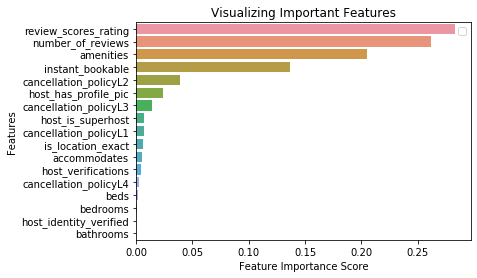

In [81]:
# tf coef
feature_imp = pd.Series(model_rf.feature_importances_,index=df_2).sort_values(ascending=False)
print (feature_imp)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
list3 = [['Train Accuracy',0.872],['Test Accuracy',0.878],['Baseline Accuracy',0.794]]
df5 = pd.DataFrame(list3)
df5 = df5.rename(columns={0: "Dataset", 1: "Accuracy"})

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Accuracy Chart')

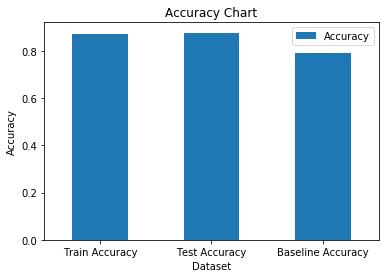

In [83]:
df5.set_index('Dataset').plot(kind='bar',rot=0)
ylabel('Accuracy')
title('Accuracy Chart')